## Cricket

Choose strike rate and average as the two factors on which you will cluster the data. You don’t need to clean the data. Just scale the data using the scale command and create the clusters.

 

#### Pointers before you proceed:

- **standardise** all parameters using standard_scaler.fit_transform() and save the output to a variable before you proceed. (check the K-Means code)<br/>
- **Choose random_state=100** for running K-Means in Python with SKLearn.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
cricket = pd.read_csv("cricket.csv", encoding="ISO-8859-1")
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [35]:
cricket['StartYear'] = cricket['Span'].apply(lambda x: int(x[:4]))
cricket['EndYear'] = cricket['Span'].apply(lambda x: int(x[-4:]))
cricket['HS_NotOut'] = cricket['HS'].apply(lambda x: 1 if x[-1] == '*' else 0)
cricket['HighScore'] = cricket['HS'].apply(lambda x: int(x[:-1]))
cricket.head()

SyntaxError: invalid syntax (<ipython-input-35-bd27aec08561>, line 1)

In [36]:
cricket['StartYear'] = cricket['StartYear'].astype('int64')
cricket['EndYear'] = cricket['EndYear'].astype('int64')
cricket['HighScore'] = cricket['HighScore'].astype('int64')

cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     79 non-null     object 
 1   Span       79 non-null     object 
 2   Mat        79 non-null     int64  
 3   Inns       79 non-null     int64  
 4   NO         79 non-null     int64  
 5   Runs       79 non-null     int64  
 6   HS         79 non-null     object 
 7   Ave        79 non-null     float64
 8   BF         79 non-null     int64  
 9   SR         79 non-null     float64
 10  100        79 non-null     int64  
 11  50         79 non-null     int64  
 12  0          79 non-null     int64  
 13  StartYear  79 non-null     int64  
 14  EndYear    79 non-null     int64  
 15  HS_NotOut  79 non-null     int64  
 16  HighScore  79 non-null     int64  
dtypes: float64(2), int64(12), object(3)
memory usage: 10.6+ KB


In [65]:
standarScaler = StandardScaler()
cricket_df_scaled = standarScaler.fit_transform(cricket[['Ave','SR']])

kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(cricket_df_scaled)

cricket['Cluster'] = kmeans.labels_
print(cricket[cricket['Player'].str.contains('Kohli')])

Player       Span  Mat  Inns  NO  Runs   HS    Ave    BF     SR  \
25  V Kohli (INDIA)  2008-2017  188   180  29  8146  183  53.94  8952  90.99   

    100  50   0  StartYear  EndYear  HS_NotOut  HighScore  Cluster  
25   27  43  11       2008     2017          0         18        2  


In [74]:
#cricket_df
cricket[cricket['Cluster']==0][['Player','Ave','SR']]

,Player,Ave,SR
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86
2,RT Ponting (AUS/ICC),42.03,80.39
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24
6,JH Kallis (Afr/ICC/SA),44.36,72.89
7,SC Ganguly (Asia/INDIA),41.02,73.70
8,R Dravid (Asia/ICC/INDIA),39.16,71.24
9,BC Lara (ICC/WI),40.48,79.51
11,Mohammad Yousuf (Asia/PAK),41.71,75.10
18,Saeed Anwar (PAK),39.21,80.67
19,S Chanderpaul (WI),41.60,70.74


In [75]:
cricket[cricket['Cluster']==1][['Player','Ave','SR']]

,Player,Ave,SR
3,ST Jayasuriya (Asia/SL),32.36,91.20
10,TM Dilshan (SL),39.27,86.23
12,AC Gilchrist (AUS/ICC),35.89,96.94
17,CH Gayle (ICC/WI),37.33,85.11
20,Yuvraj Singh (Asia/INDIA),36.55,87.67
24,V Sehwag (Asia/ICC/INDIA),35.05,104.33
27,Shahid Afridi (Asia/ICC/PAK),23.57,117.00
50,BB McCullum (NZ),30.41,96.37
57,EJG Morgan (ENG/IRE),38.73,88.62
59,SR Watson (AUS),40.54,90.44


In [77]:
cricket[cricket['Cluster']==2][['Player','Ave','SR']]

,Player,Ave,SR
0,SR Tendulkar (INDIA),44.83,86.23
13,MS Dhoni (Asia/INDIA),51.32,88.69
15,AB de Villiers (Afr/SA),53.55,100.25
25,V Kohli (INDIA),53.94,90.99
34,HM Amla (SA),50.25,89.05
38,MG Bevan (AUS),53.58,74.16
42,IVA Richards (WI),47.00,90.20
63,MJ Guptill (NZ),43.30,87.73
64,MEK Hussey (AUS),48.15,87.16


In [76]:
cricket[cricket['Cluster']==3][['Player','Ave','SR']]

,Player,Ave,SR
4,DPMD Jayawardene (Asia/SL),33.37,78.96
14,M Azharuddin (INDIA),36.92,74.02
16,PA de Silva (SL),34.90,81.13
22,MS Atapattu (SL),37.57,67.72
26,HH Gibbs (SA),36.13,83.26
28,SP Fleming (ICC/NZ),32.40,71.49
30,SR Waugh (AUS),32.90,75.91
31,A Ranatunga (SL),35.84,77.90
33,Younis Khan (PAK),31.24,75.29
35,Saleem Malik (PAK),32.88,76.41


In [133]:
print(cricket.loc[0, ['Player']].str.split('\xa0')[0][0])

SR Tendulkar


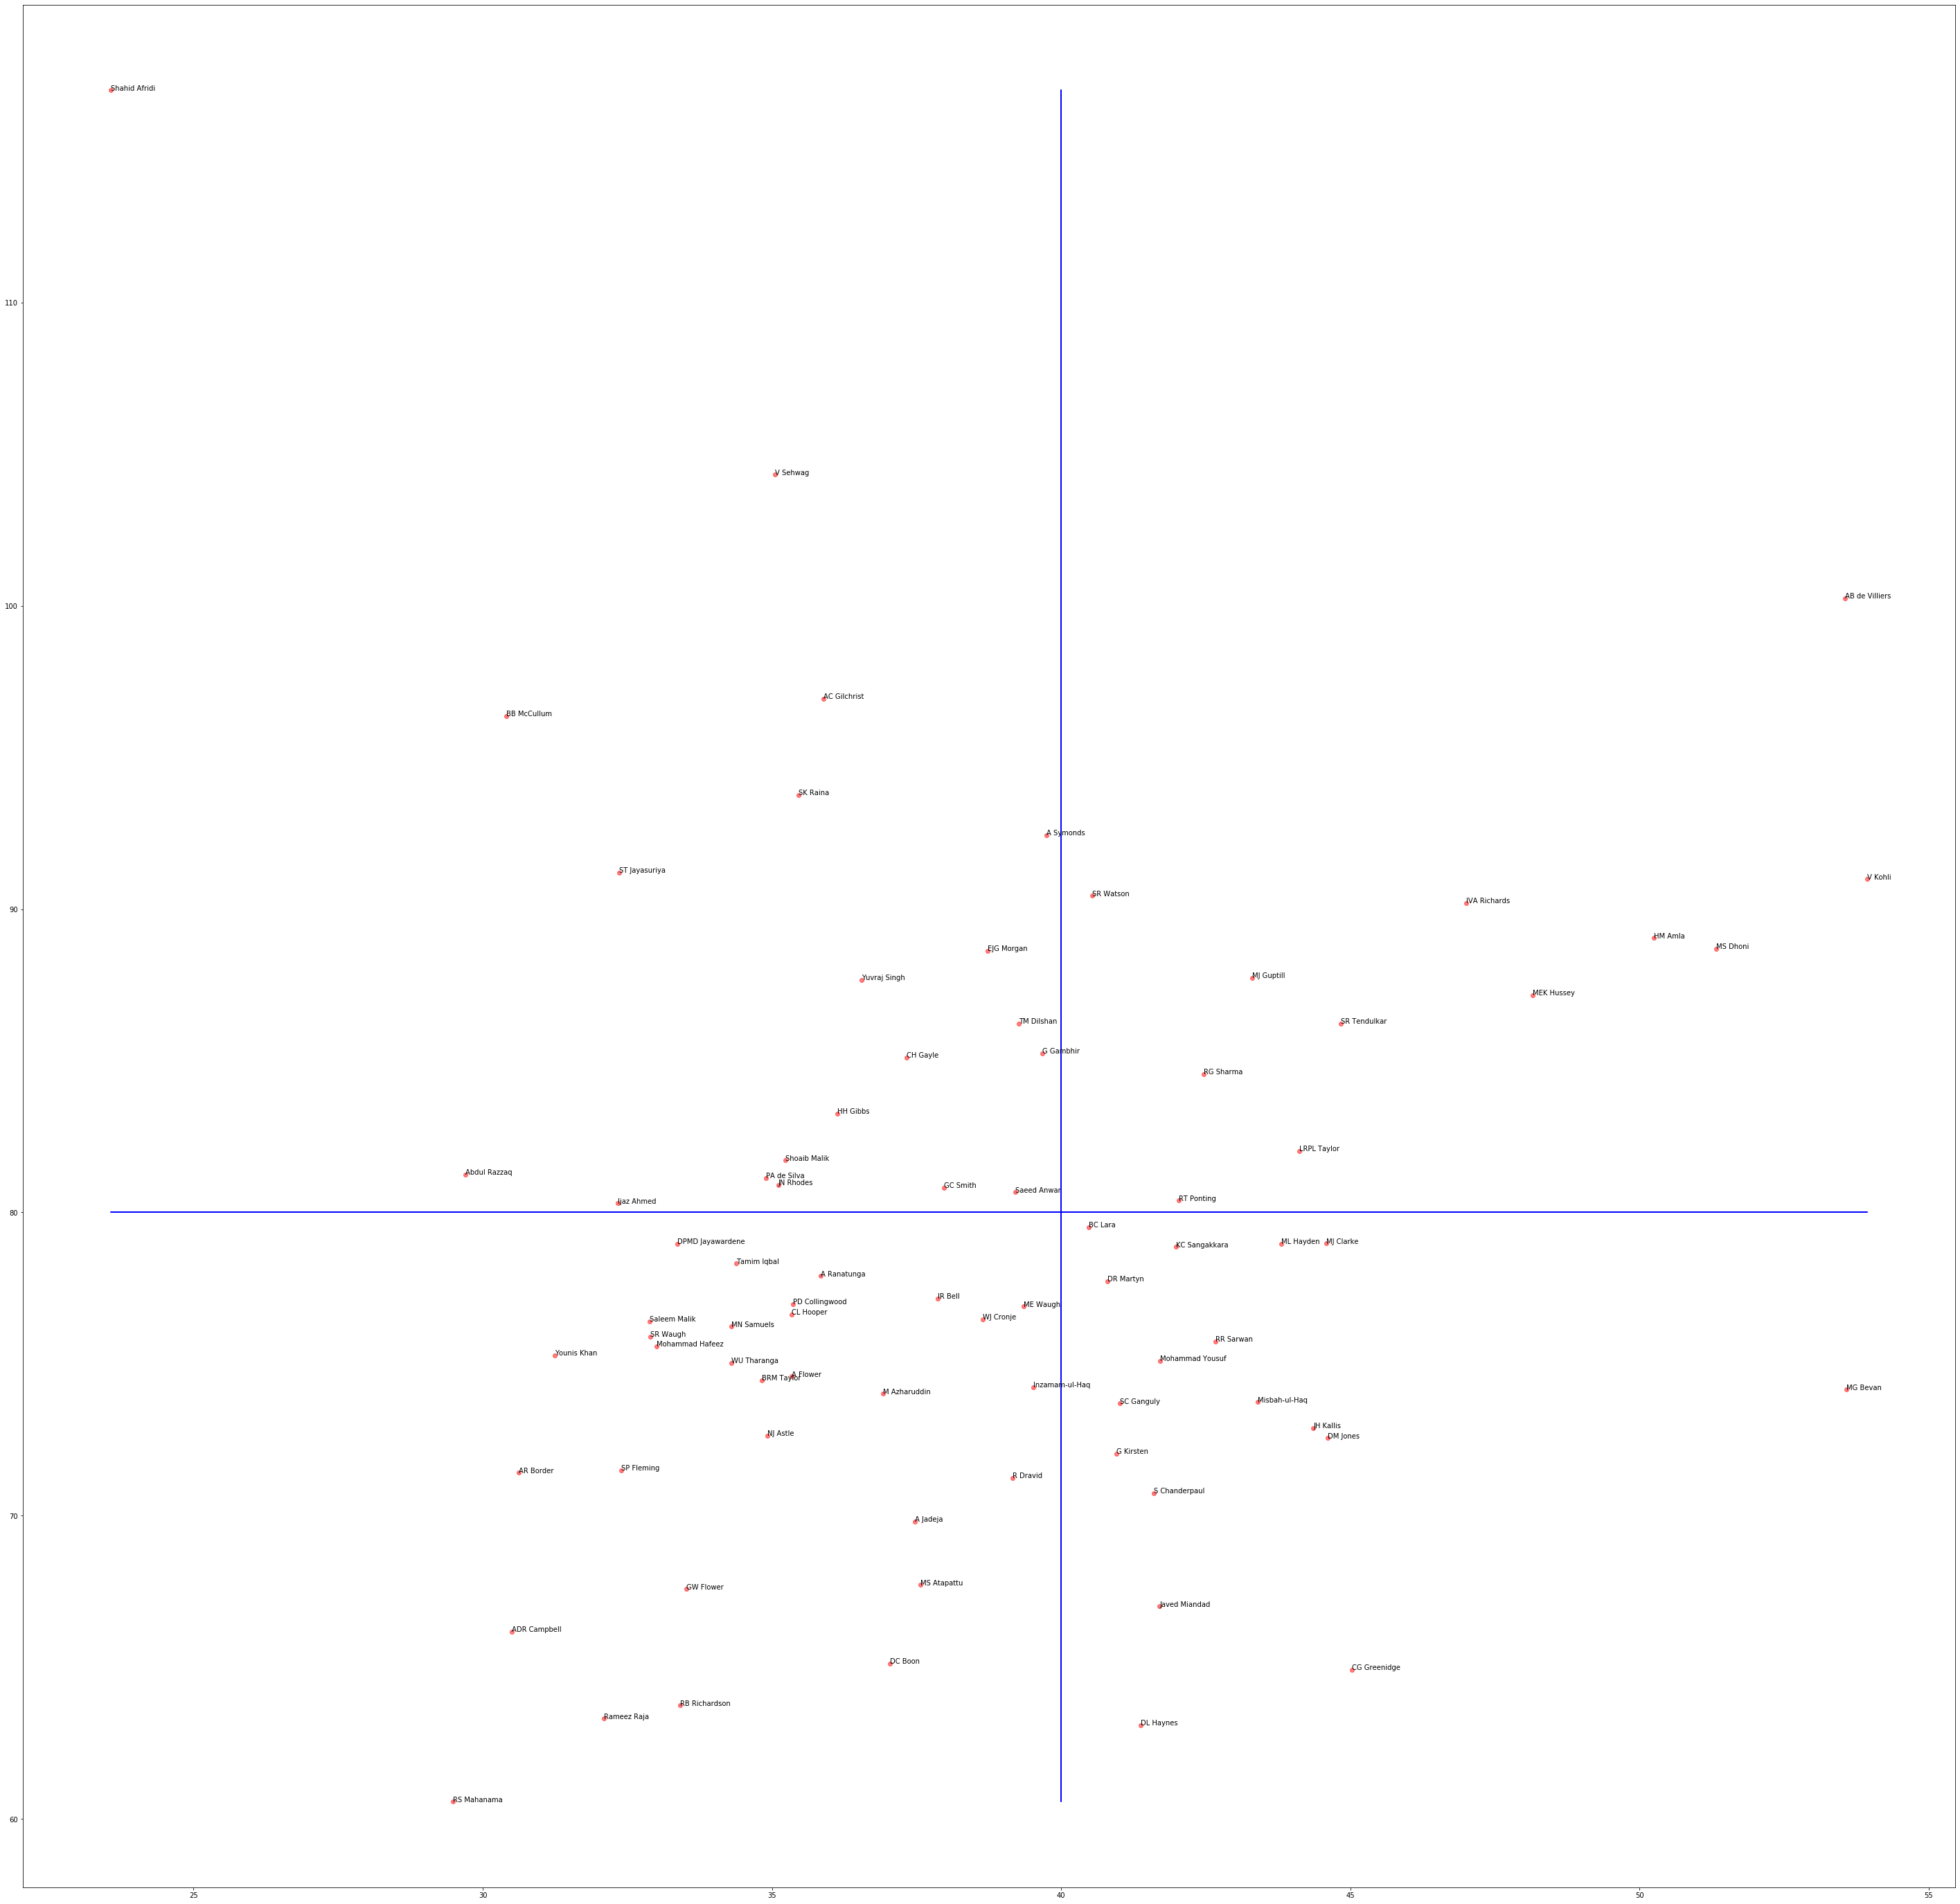

In [135]:
from matplotlib import pyplot as plt
plt.figure(figsize=(50,50))
plt.plot(cricket[['Ave']], cricket[['SR']], 'ro', alpha = 0.5)
for i in range(cricket.shape[0]):
    ave = cricket.loc[i,['Ave']]
    sr = cricket.loc[i, ['SR']]
    name = cricket.loc[i, ['Player']].str.split('\xa0')[0]
    plt.text(ave, sr, str(name[0]))

mean_ave = [40]*len(cricket_df)
mean_sr = [80]*len(cricket_df)
plt.plot(cricket[['Ave']], mean_sr, 'b-')
plt.plot(mean_ave, cricket[['SR']], 'b-')

plt.show()